### 1. Load libraries

In [1]:
# import packages
import pandas as pd
import datetime as dt
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams

%matplotlib inline

plt.style.use("fivethirtyeight")

### 2. Load data

In [2]:
# Download data from the period 2010-2020 
all_files = glob.glob("./data/datos*.csv")

dfs = []

for filename in all_files:
    df = pd.read_csv(filename, header=0, sep=';')
    dfs.append(df)

df = pd.concat(dfs, axis=0, ignore_index=True)

In [3]:
df.head()

PROVINCIA  MUNICIPIO  ESTACION  MAGNITUD PUNTO_MUESTREO   ANO  MES  D01  \
0         28         79         4         1  28079004_1_38  2017    1  6.0   
1         28         79         4         1  28079004_1_38  2017    2  8.0   
2         28         79         4         1  28079004_1_38  2017    3  5.0   
3         28         79         4         1  28079004_1_38  2017    4  4.0   
4         28         79         4         1  28079004_1_38  2017    5  4.0   

  V01  D02  ...  D27  V27  D28  V28  D29  V29  D30  V30  D31  V31  
0   V  8.0  ...  5.0    V  4.0    V  4.0    V  5.0    V  7.0    V  
1   V  4.0  ...  4.0    V  4.0    V  0.0    N  0.0    N  0.0    N  
2   V  7.0  ...  4.0    V  5.0    V  7.0    V  7.0    V  5.0    V  
3   V  4.0  ...  3.0    V  4.0    V  4.0    V  4.0    V  0.0    N  
4   V  5.0  ...  5.0    V  5.0    V  4.0    V  4.0    V  5.0    V  

[5 rows x 69 columns]

In [4]:
# Lower column names
df.columns = map(str.lower, df.columns)

### 3. Data cleansing

In [5]:
# Select columns with daily values

days= df.filter(regex=("^d.*$"))

days.head()

d01  d02   d03  d04  d05   d06   d07   d08   d09   d10  ...   d22   d23  \
0  6.0  8.0  12.0  9.0  7.0  10.0  10.0  11.0  10.0  12.0  ...   7.0   9.0   
1  8.0  4.0   3.0  3.0  3.0   4.0   5.0   5.0   6.0   8.0  ...  12.0  11.0   
2  5.0  7.0   5.0  3.0  3.0   4.0   6.0   9.0  10.0  10.0  ...   4.0   3.0   
3  4.0  4.0   5.0  7.0  4.0   4.0   5.0   5.0   5.0   6.0  ...   5.0   5.0   
4  4.0  5.0   5.0  6.0  5.0   4.0   4.0   4.0   5.0   4.0  ...   5.0   5.0   

    d24  d25  d26  d27  d28  d29  d30  d31  
0  12.0  9.0  9.0  5.0  4.0  4.0  5.0  7.0  
1   6.0  6.0  5.0  4.0  4.0  0.0  0.0  0.0  
2   4.0  4.0  4.0  4.0  5.0  7.0  7.0  5.0  
3   6.0  4.0  4.0  3.0  4.0  4.0  4.0  0.0  
4   5.0  5.0  5.0  5.0  5.0  4.0  4.0  5.0  

[5 rows x 31 columns]

In [6]:
# Select columns with data validity
validity = df.filter(regex=("^v.*$"))

validity.head()

v01 v02 v03 v04 v05 v06 v07 v08 v09 v10  ... v22 v23 v24 v25 v26 v27 v28  \
0   V   V   V   V   V   V   V   V   V   V  ...   V   V   V   V   V   V   V   
1   V   V   V   V   V   V   V   V   V   V  ...   V   V   V   V   V   V   V   
2   V   V   V   V   V   V   V   V   V   V  ...   V   V   V   V   V   V   V   
3   V   V   V   V   V   V   V   V   V   V  ...   V   V   V   V   V   V   V   
4   V   V   V   V   V   V   V   V   V   V  ...   V   V   V   V   V   V   V   

  v29 v30 v31  
0   V   V   V  
1   N   N   N  
2   V   V   V  
3   V   V   N  
4   V   V   V  

[5 rows x 31 columns]

In [7]:
# Convert V in null values
validity = validity.replace('V', np.nan)

In [8]:
# Change column names in validty and use 'days' column names
validity.columns = days.columns

In [9]:
# Use combine_first to get valid data
valid_data= validity.combine_first(days)

In [10]:
# Replace 'N' values for np.nan
valid_data= valid_data.replace('N', np.nan)

valid_data.head()

d01  d02   d03  d04  d05   d06   d07   d08   d09   d10  ...   d22   d23  \
0  6.0  8.0  12.0  9.0  7.0  10.0  10.0  11.0  10.0  12.0  ...   7.0   9.0   
1  8.0  4.0   3.0  3.0  3.0   4.0   5.0   5.0   6.0   8.0  ...  12.0  11.0   
2  5.0  7.0   5.0  3.0  3.0   4.0   6.0   9.0  10.0  10.0  ...   4.0   3.0   
3  4.0  4.0   5.0  7.0  4.0   4.0   5.0   5.0   5.0   6.0  ...   5.0   5.0   
4  4.0  5.0   5.0  6.0  5.0   4.0   4.0   4.0   5.0   4.0  ...   5.0   5.0   

    d24  d25  d26  d27  d28  d29  d30  d31  
0  12.0  9.0  9.0  5.0  4.0  4.0  5.0  7.0  
1   6.0  6.0  5.0  4.0  4.0  NaN  NaN  NaN  
2   4.0  4.0  4.0  4.0  5.0  7.0  7.0  5.0  
3   6.0  4.0  4.0  3.0  4.0  4.0  4.0  NaN  
4   5.0  5.0  5.0  5.0  5.0  4.0  4.0  5.0  

[5 rows x 31 columns]

In [17]:
cols = valid_data.columns

In [18]:
# Create a new dataframe concatenating columns from df_match_no2 and valid measurements
df_valid = pd.concat([df[['estacion', 'magnitud', 'ano','mes']], valid_data], axis=1)

df_valid.head()

estacion  magnitud   ano  mes  d01  d02   d03  d04  d05   d06  ...   d22  \
0         4         1  2017    1  6.0  8.0  12.0  9.0  7.0  10.0  ...   7.0   
1         4         1  2017    2  8.0  4.0   3.0  3.0  3.0   4.0  ...  12.0   
2         4         1  2017    3  5.0  7.0   5.0  3.0  3.0   4.0  ...   4.0   
3         4         1  2017    4  4.0  4.0   5.0  7.0  4.0   4.0  ...   5.0   
4         4         1  2017    5  4.0  5.0   5.0  6.0  5.0   4.0  ...   5.0   

    d23   d24  d25  d26  d27  d28  d29  d30  d31  
0   9.0  12.0  9.0  9.0  5.0  4.0  4.0  5.0  7.0  
1  11.0   6.0  6.0  5.0  4.0  4.0  NaN  NaN  NaN  
2   3.0   4.0  4.0  4.0  4.0  5.0  7.0  7.0  5.0  
3   5.0   6.0  4.0  4.0  3.0  4.0  4.0  4.0  NaN  
4   5.0   5.0  5.0  5.0  5.0  5.0  4.0  4.0  5.0  

[5 rows x 35 columns]

In [19]:
# Use melt to create a column 'day'
df_valid = pd.melt(df_valid,id_vars= ['estacion','magnitud','ano','mes'], value_vars =cols,
                             var_name ='dia', value_name ='valor')
                                                           
df_valid.head()

estacion  magnitud   ano  mes  dia  valor
0         4         1  2017    1  d01    6.0
1         4         1  2017    2  d01    8.0
2         4         1  2017    3  d01    5.0
3         4         1  2017    4  d01    4.0
4         4         1  2017    5  d01    4.0

In [21]:
# Drop rows with NULL values
df_valid = df_valid.dropna()

In [22]:
# Remove 'd' from column 'day'
df_valid['dia'] = df_valid['dia'].str.replace('d', '')

In [23]:
# Create a new column 'date' joining year, month and day
df_valid['fecha'] = (df_valid['ano'].map(str) + "-" + df_valid['mes'].map(str) + "-" 
                                                             + df_valid['dia'].map(str))

In [24]:
# Convert 'date' to datetime
df_valid['fecha'] = pd.to_datetime(df_valid['fecha'], format='%Y-%m-%d')

df_valid.head()

estacion  magnitud   ano  mes dia  valor      fecha
0         4         1  2017    1  01    6.0 2017-01-01
1         4         1  2017    2  01    8.0 2017-02-01
2         4         1  2017    3  01    5.0 2017-03-01
3         4         1  2017    4  01    4.0 2017-04-01
4         4         1  2017    5  01    4.0 2017-05-01

In [25]:
# Drop columns 'year','month','day'
df_valid.drop(columns=['ano', 'mes', 'dia'], inplace=True)

df_valid.head()

estacion  magnitud  valor      fecha
0         4         1    6.0 2017-01-01
1         4         1    8.0 2017-02-01
2         4         1    5.0 2017-03-01
3         4         1    4.0 2017-04-01
4         4         1    4.0 2017-05-01

In [27]:
# Remove data from stations that are outside the city
df_valid_no_background = df_valid[(df_valid.estacion != 58) & (df_valid.estacion !=24)]

In [28]:
# Use grouby to calculate daily average emission by date and particle.
df_avg_emissions = pd.DataFrame(df_valid_no_background.groupby(['fecha', 'magnitud'])
                                ['valor']
                                .mean().reset_index())


In [29]:
# Use pivot to turn every particle in a column
df_avg_emissions = pd.pivot(df_avg_emissions, index= 'fecha', columns='magnitud',values='valor')

In [30]:
# Create list with name of particles and rename columns
particles = ['so2', 'co','no','no2','pm2_5','pm10','nox','o3','tol','ben','ebe','tch','ch4','nmhc']

df_avg_emissions.columns = particles


In [31]:
# Convert index to datetime
df_avg_emissions.index = pd.to_datetime(df_avg_emissions.index)

### 4. Exploratory Data analysis

In [32]:
df_avg_emissions.describe()

so2           co           no          no2        pm2_5  \
count  3773.000000  3773.000000  3773.000000  3773.000000  3771.000000   
mean      6.980857     0.368197    23.502338    40.404743    11.154932   
std       2.995626     0.147052    28.563770    17.907821     5.508382   
min       1.666667     0.144444     1.636364     6.428571     2.400000   
25%       4.875000     0.266667     7.000000    27.136364     7.400000   
50%       6.500000     0.322222    11.909091    37.285714    10.166667   
75%       8.666667     0.422222    26.363636    50.772727    13.800000   
max      19.333333     1.222222   220.954545   111.190476    59.800000   

              pm10          nox           o3          tol          ben  \
count  3773.000000  3773.000000  3773.000000  3773.000000  3773.000000   
mean     20.398133    76.432983    47.354693     2.993781     0.715563   
std      11.972461    59.779065    22.417276     2.069540     0.454574   
min       2.636364     9.952381     2.333333     0.200000     0.120000   
25%      12.454545    38.181818    30.083333     1.580000     0.400000   
50%      18.250000    56.272727    49.166667     2.500000     0.600000   
75%      25.363636    91.227273    64.750000     3.750000     0.880000   
max     219.545455   435.772727   109.833333    16.300000     3.200000   

               ebe          tch          ch4         nmhc  
count  3773.000000  3765.000000  3765.000000  3765.000000  
mean      0.690861     1.474137     1.294149     0.181197  
std       0.531010     0.159554     0.145238     0.110357  
min       0.100000     0.950000     0.720000     0.020000  
25%       0.300000     1.360000     1.200000     0.115000  
50%       0.600000     1.440000     1.280000     0.160000  
75%       0.880000     1.560000     1.385000     0.210000  
max       4.120000     2.580000     2.260000     0.910000

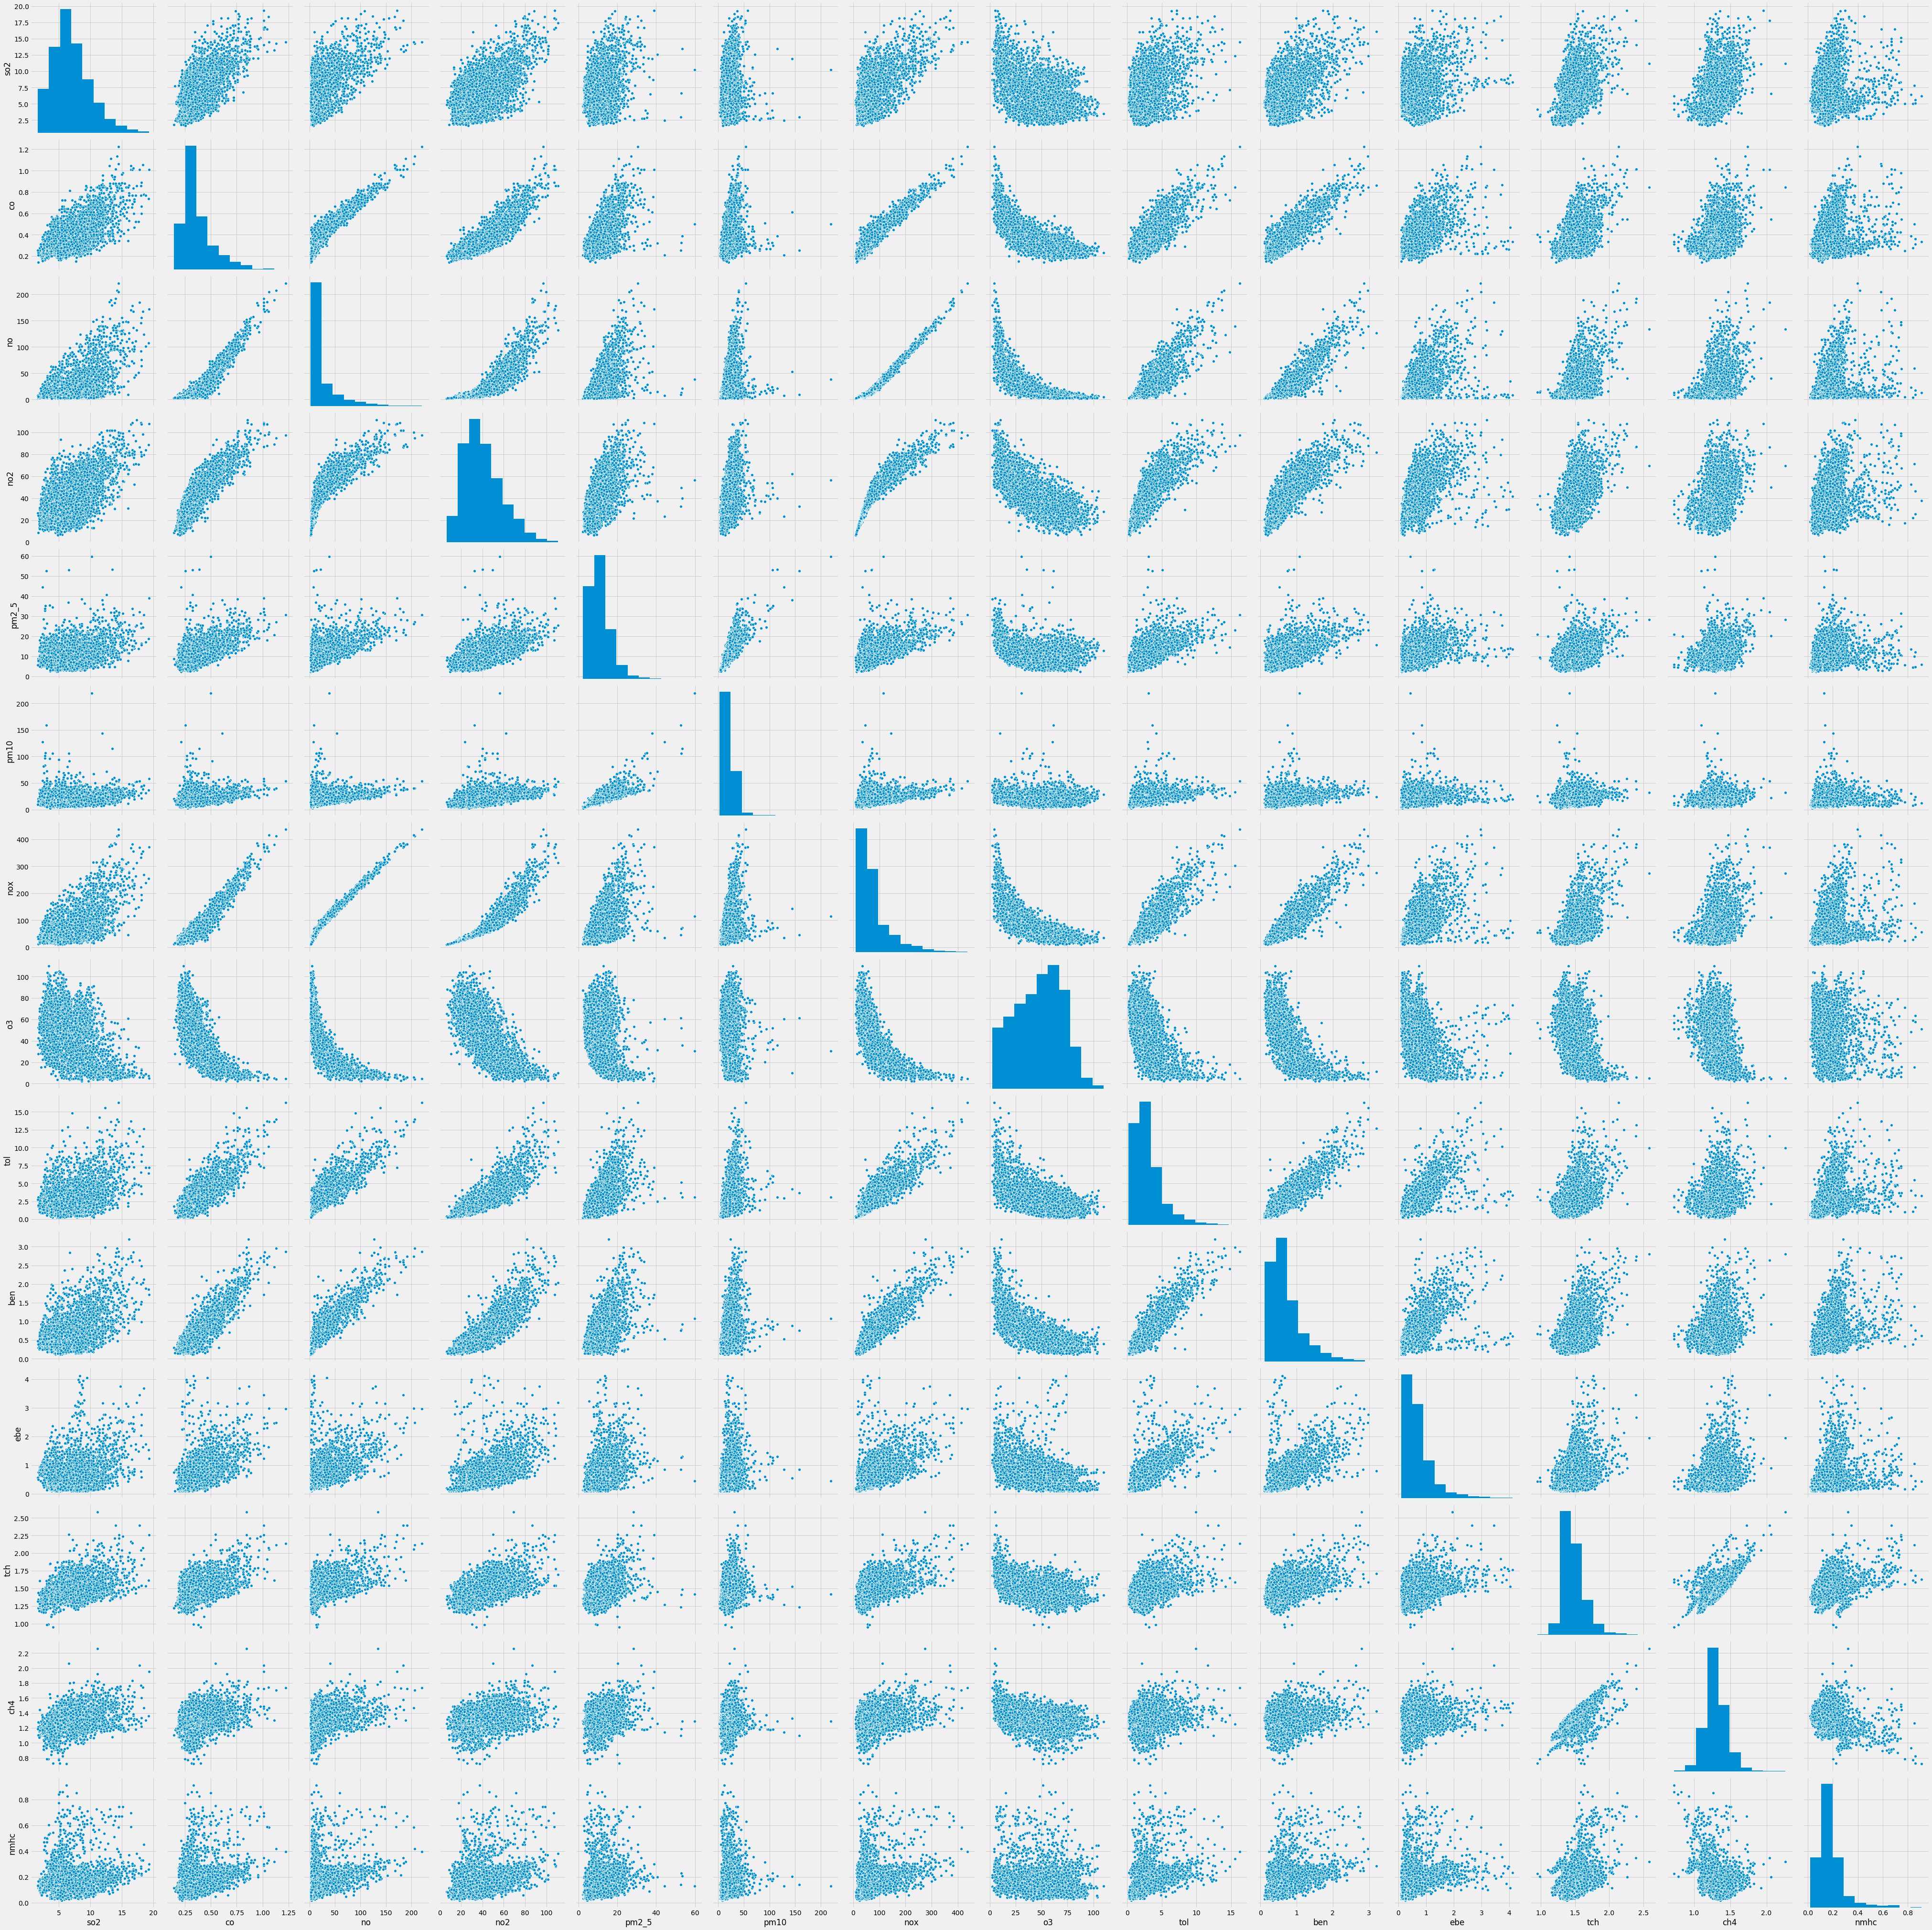

In [33]:
# Pairplot to see the correlation between pollutants
sns.pairplot(df_avg_emissions, 
             vars=df_avg_emissions.columns,
             height=4.
             )
pass

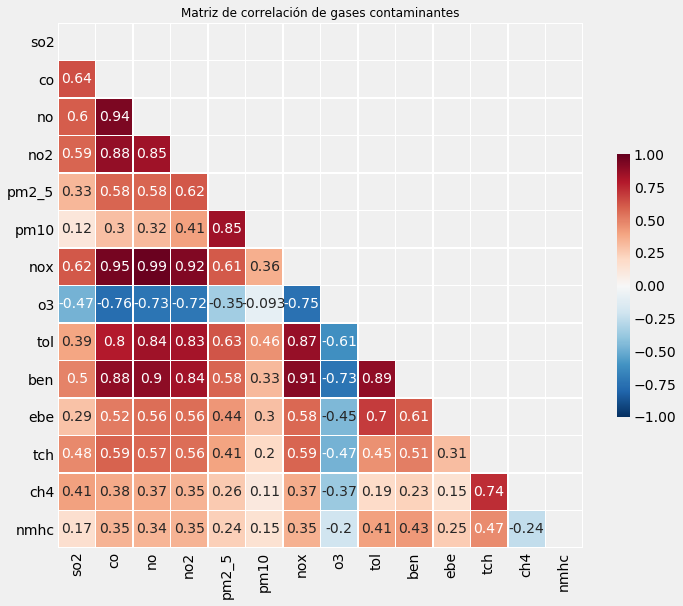

In [34]:
# Heatmap to see correlation coefficient between variables. Most of the pairs of variables have a positive 
# correlation. The only exception is ozone (O3), which is negatively correlated with the rest of the 
# particles, meaning that its value decreases when other particles values increase.

# Compute the correlation matrix
corr = df_avg_emissions.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = 'RdBu_r'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Matriz de correlación de agentes contaminantes', fontsize = 12)

pass;

In [35]:
# NO2 values have a strong positive correlation with other gases, such Nitrogen oxides (NOx), 
# Carbon monoxide (CO), nitric oxide (NO) or benzene (BEN)
corr_matrix = df_avg_emissions.corr()
print('Correlation between NO2 and other gases:\n')
print(corr_matrix["no2"].sort_values(ascending=False))

Correlation between NO2 and other gases:

no2      1.000000
nox      0.922952
co       0.881957
no       0.850905
ben      0.842828
tol      0.833256
pm2_5    0.624502
so2      0.585067
ebe      0.559206
tch      0.558328
pm10     0.411855
nmhc     0.350968
ch4      0.347959
o3      -0.724481
Name: no2, dtype: float64


### 5. Data visualisation

#### 5.1. Daily emissions in March and april 2020

In [36]:
# Emissions in March 2020
emissions_march_april_2020 = df_avg_emissions[(df_avg_emissions.index.month >=3) 
                                        & (df_avg_emissions.index.year ==2020)]


In [37]:
emissions_march_april_2020.index = pd.to_datetime(emissions_march_april_2020.index)

In [38]:
emissions_march_april_2020 = emissions_march_april_2020.groupby([emissions_march_april_2020.index.month,
                                                           emissions_march_april_2020.index.day]).mean()

In [39]:
emissions_march_april_2020.index = emissions_march_april_2020.index.droplevel()


In [40]:
emissions_march_april_2020.reset_index(inplace=True)

In [41]:
emissions_march_april_2020.index += 1 

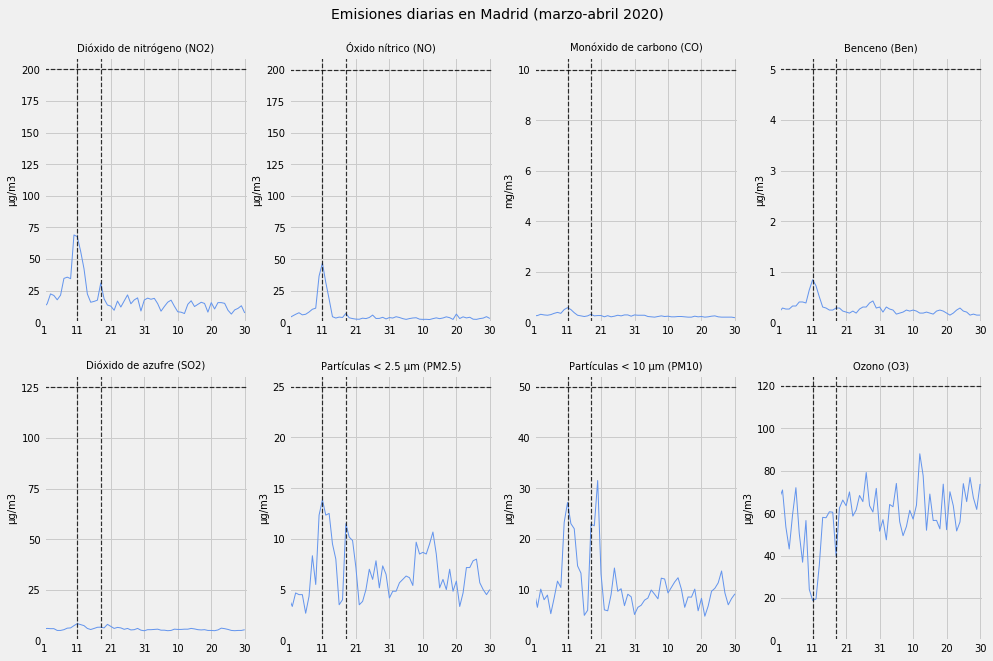

In [42]:
f, axes = plt.subplots(2, 4, figsize=(15, 10))

f.suptitle('Emisiones diarias en Madrid (marzo-abril 2020)', y=0.95,fontsize=14)

sns.lineplot(x=emissions_march_april_2020.index, y="no2", data=emissions_march_april_2020, 
             color = 'cornflowerblue',linewidth=1.0, ax=axes[0, 0])
axes[0,0].set_title("Dióxido de nitrógeno (NO2)", fontsize=10)
plt.sca(axes[0,0])
plt.ylabel("µg/m3", fontsize=10)
plt.axhline(y=200, alpha=0.8, color = 'black',linewidth=1.2, linestyle='dashed')
plt.axvline(x=11, alpha=0.8, linestyle='dashed', color = 'black', linewidth=1.2)
plt.axvline(x=18, alpha=0.8, linestyle='dashed',color = 'black',linewidth=1.2)
plt.xlabel('')
plt.yticks(fontsize=10)
plt.xticks(np.arange(1,70, 10),['1','11','21','31','10','20','30'], fontsize=10)
plt.ylim(0)
plt.xlim(1, 62)

sns.lineplot(x=emissions_march_april_2020.index, y="no", data=emissions_march_april_2020, 
             color = 'cornflowerblue',linewidth=1.0, ax=axes[0, 1])
plt.sca(axes[0,1])
axes[0,1].set_title("Óxido nítrico (NO)", fontsize=10)
plt.xlabel('')
plt.ylabel("µg/m3", fontsize=10)
plt.axhline(y=200, alpha=0.8, color = 'black',linewidth=1.2, linestyle='dashed')
plt.axvline(x=11,linestyle='dashed', alpha=0.8, color = 'black', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', alpha=0.8, color = 'black',linewidth=1.2)
plt.xticks(np.arange(1,70, 10),['1','11','21','31','10','20','30'], fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0)
plt.xlim(1, 62)


sns.lineplot(x=emissions_march_april_2020.index, y="co", data=emissions_march_april_2020, 
             color = 'cornflowerblue',linewidth=1.0, ax=axes[0, 2])
axes[0,2].set_title("Monóxido de carbono (CO)", fontsize=10)
plt.sca(axes[0,2])
plt.xlabel('')
plt.ylabel("mg/m3", fontsize=10)
plt.axhline(y=10, alpha=0.8, color = 'black',linewidth=1.2, linestyle='dashed')
plt.axvline(x=11,linestyle='dashed', alpha=0.8, color = 'black', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', alpha=0.8, color = 'black',linewidth=1.2)
plt.xticks(np.arange(1,70, 10),['1','11','21','31','10','20','30'], fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0)
plt.xlim(1, 62)

sns.lineplot(x=emissions_march_april_2020.index, y="ben", data=emissions_march_april_2020, 
             color = 'cornflowerblue', linewidth=1.0, ax=axes[0,3])
axes[0,3].set_title("Benceno (Ben)", fontsize=10)
plt.sca(axes[0,3])
plt.xlabel('')
plt.ylabel("µg/m3", fontsize=10)
plt.axhline(y=5, alpha=0.8, color = 'black',linewidth=1.2, linestyle='dashed')
plt.axvline(x=11,linestyle='dashed', alpha=0.8, color = 'black', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', alpha=0.8, color = 'black',linewidth=1.2)
plt.xticks(np.arange(1,70, 10),['1','11','21','31','10','20','30'], fontsize=10)
plt.yticks(list(range(0,6, 1)),fontsize=10)
plt.ylim(0)
plt.xlim(1, 62)

sns.lineplot(x=emissions_march_april_2020.index, y="so2", data=emissions_march_april_2020, 
             color = 'cornflowerblue',linewidth=1.0, ax=axes[1,0])
plt.sca(axes[1,0])
plt.xlabel('')
plt.ylabel("µg/m3", fontsize=10)
axes[1,0].set_title("Dióxido de azufre (SO2)", fontsize=10)
plt.axhline(y=125, alpha=0.8, color = 'black',linewidth=1.2, linestyle='dashed')
plt.axvline(x=11,linestyle='dashed', alpha=0.8, color = 'black', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', alpha=0.8, color = 'black',linewidth=1.2)
plt.xticks(np.arange(1,70, 10),['1','11','21','31','10','20','30'], fontsize=10)
plt.yticks(list(range(0,150, 25)),fontsize=10)
plt.ylim(0)
plt.xlim(1, 62)


sns.lineplot(x=emissions_march_april_2020.index, y="pm2_5", data=emissions_march_april_2020, 
             color = 'cornflowerblue', linewidth=1.0, ax=axes[1, 1])
plt.sca(axes[1,1])
plt.xlabel('')
plt.ylabel("µg/m3", fontsize=10)
axes[1,1].set_title("Partículas < 2.5 µm (PM2.5)", fontsize=10)
plt.axhline(y=25, alpha=0.8, color = 'black',linewidth=1.2,linestyle='dashed')
plt.axvline(x=11,linestyle='dashed', alpha=0.8, color = 'black', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', alpha=0.8, color = 'black',linewidth=1.2)
plt.xticks(np.arange(1,70, 10),['1','11','21','31','10','20','30'], fontsize=10)
plt.yticks(list(range(0,26, 5)),fontsize=10)
plt.ylim(0)
plt.xlim(1, 62)


sns.lineplot(x=emissions_march_april_2020.index, y="pm10", data=emissions_march_april_2020, 
             color = 'cornflowerblue', linewidth=1.0, ax=axes[1,2])
plt.sca(axes[1,2])
plt.xlabel('')
plt.ylabel("µg/m3", fontsize=10)
axes[1,2].set_title("Partículas < 10 µm (PM10)", fontsize=10)
plt.axhline(y=50, alpha=0.8, color = 'black',linewidth=1.2,linestyle='dashed')
plt.axvline(x=11,linestyle='dashed', alpha=0.8, color = 'black', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', alpha=0.8, color = 'black',linewidth=1.2)
plt.xticks(np.arange(1,70, 10),['1','11','21','31','10','20','30'], fontsize=10)
plt.yticks(list(range(0,51, 10)),fontsize=10)
plt.ylim(0)
plt.xlim(1, 62)


sns.lineplot(x=emissions_march_april_2020.index, y="o3", data=emissions_march_april_2020, 
             color = 'cornflowerblue', linewidth=1.0, ax=axes[1, 3])
plt.sca(axes[1,3])
plt.xlabel('')
plt.ylabel("µg/m3", fontsize=10)
axes[1,3].set_title("Ozono (O3)", fontsize=10)
plt.axhline(y=120, alpha=0.8, color = 'black',linewidth=1.2, linestyle='dashed')
plt.axvline(x=11,linestyle='dashed', alpha=0.8, color = 'black', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', alpha=0.8, color = 'black',linewidth=1.2)
plt.xticks(np.arange(1,70, 10),['1','11','21','31','10','20','30'], fontsize=10)
plt.yticks(list(range(0,121, 20)),fontsize=10)
plt.ylim(0)
plt.xlim(1, 62)


plt.savefig('subplot.pdf', bbox_inches='tight')
pass;

#### 5.2. NO2 emissions in March and april 2020

In [48]:
# Emissions in March and April 2020
emissions_march_april_2020 = df_avg_emissions[(df_avg_emissions.index.month >= 3) 
                                        & (df_avg_emissions.index.year ==2020)]


In [49]:
# NO2 emissions in March and April 2020
emissions_march_april_2020 = pd.DataFrame(emissions_march_april_2020.groupby
                                    ([emissions_march_april_2020.index.month,
                                      emissions_march_april_2020.index.day])['no2'].mean())

In [50]:
emissions_march_april_2020.index = emissions_march_april_2020.index.droplevel()


In [51]:
emissions_march_april_2020.reset_index(inplace=True)

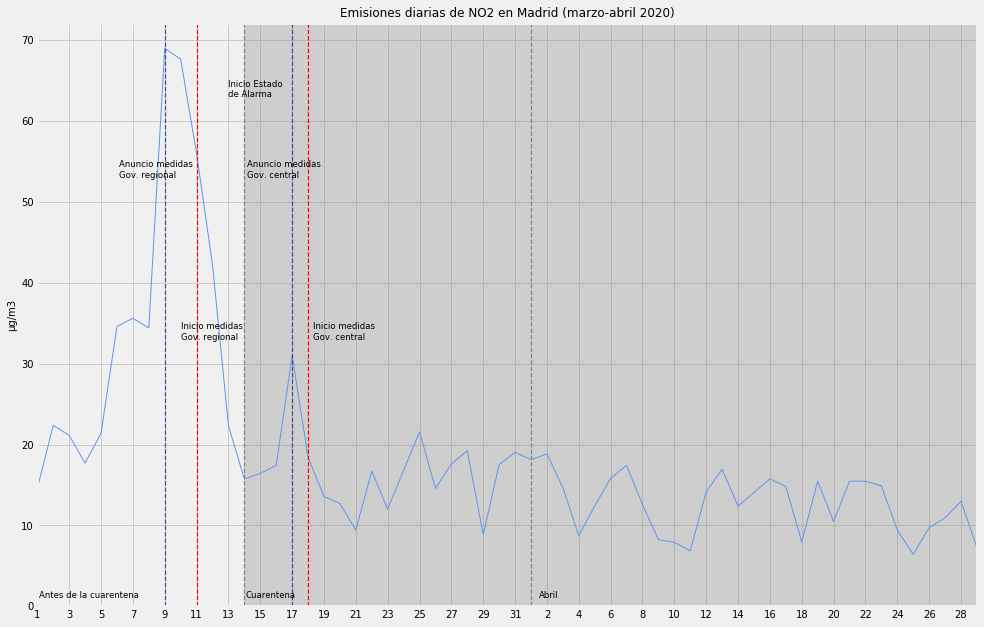

In [61]:
plt.figure(figsize=(15,10))
ax = sns.lineplot(x=emissions_march_april_2020.index, y="no2",
                  data=emissions_march_april_2020, color = 'cornflowerblue', linewidth=1.0)

plt.title('Emisiones diarias de NO2 en Madrid (marzo-abril 2020)', fontsize = 12)

plt.xlabel('')
plt.ylabel('µg/m3', fontsize = 10)

plt.yticks(fontsize=10)
plt.xticks(np.arange(1,70, 2),['1','3','5','7','9','11','13','15','17','19',
                               '21','23','25','27','29','31','2','4','6','8','10',
                              '12','14','16','18','20','22','24','26','28','30'], fontsize=10)

plt.ylim(ymin=0)
plt.xlim(xmin=1, xmax=60)

ax.axvspan(xmin=14, xmax=61, color='grey', alpha=0.3)

plt.axvline(x=9,linestyle='dashed', color = '#334f8d', linewidth=1.2)
plt.axvline(x=11,linestyle='dashed', color = 'red', linewidth=1.2)
plt.axvline(x=14,linestyle='dashed', color = 'grey', linewidth=1.2)
plt.axvline(x=17,linestyle='dashed', color = '#334f8d', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', color = 'red', linewidth=1.2)
plt.axvline(x=32,linestyle='dashed', color = 'grey', linewidth=1.2)


plt.text(x=6.1, y=53, s='Anuncio medidas\nGov. regional', color='black', fontsize=8.5)
plt.text(x=10, y=33, s='Inicio medidas\nGov. regional', color='black', fontsize=8.5)
plt.text(x=13, y=63, s='Inicio Estado\nde Alarma', color='black', fontsize=8.5)
plt.text(x=14.17, y=53, s='Anuncio medidas\nGov. central', color='black', fontsize=8.5)
plt.text(x=18.3, y=33, s='Inicio medidas\nGov. central', color='black', fontsize=8.5)
plt.text(1.1, 1,'Antes de la cuarentena', color='black', fontsize=8.5)
plt.text(14.1, 1,'Cuarentena', color='black', fontsize=8.5)
plt.text(32.5, 1,'Abril', color='black', fontsize=8.5)

plt.savefig('no2_marzo.pdf', bbox_inches='tight')
pass;

#### 5.3. NO2 emissions in 2020 compared to historical timeseries

##### 5.3.1. Per month

In [62]:
# Calculate monthly no2 emissions 
monthly_no2_emissions =df_avg_emissions[['no2']].resample(rule='M').mean()

In [63]:
# Calculate monthly no2 emissions in 2020
monthly_no2_emissions_2020= monthly_no2_emissions[monthly_no2_emissions.index.year ==2020]

In [64]:
# Calculate monthly no2 emissions before 2020
monthly_no2_emissions_before_2020= monthly_no2_emissions[monthly_no2_emissions.index.year < 2020]

In [65]:
# Group by month to get no2 emissions average per month
monthly_no2_emissions_before_2020_per_month = (monthly_no2_emissions_before_2020
                                                .groupby(monthly_no2_emissions_before_2020.index.month)
                                                .mean())

In [66]:
monthly_no2_emissions_2020= monthly_no2_emissions_2020.groupby(monthly_no2_emissions_2020.index.month).mean()

In [69]:
comparison = monthly_no2_emissions_before_2020_per_month.merge(monthly_no2_emissions_2020, how='outer', on ='fecha')

comparison.columns = ['Media histórica', 'Emisiones en 2020']

In [70]:
comparison

Media histórica  Emisiones en 2020
fecha                                    
1            52.948407          48.609321
2            46.314774          47.283624
3            39.367569          24.215054
4            32.612842          12.845599
5            30.274209                NaN
6            30.674038                NaN
7            32.226145                NaN
8            29.681342                NaN
9            40.764791                NaN
10           48.503445                NaN
11           47.584338                NaN
12           56.957251                NaN

In [72]:
# Calculate average difference (%)
print('Diferencia de emisiones marzo:', ((39.367569 - 24.215054) /39.367569 )*100, '%')

Diferencia de emisiones marzo: 38.48984172733654 %


In [74]:
print('Diferencia de emisiones abril:', ((32.612842 - 12.845599) /32.612842 )*100, '%')

Diferencia de emisiones abril: 60.611838121927555 %


##### 5.3.1. Per week

In [75]:
# Weekly no2 emissions
weekly_no2_emissions =df_avg_emissions[['no2']].resample(rule='W').mean()

In [76]:
# Calculate monthly no2 emissions in 2020
weekly_no2_emissions_2020= weekly_no2_emissions[(weekly_no2_emissions.index.year ==2020)
                                               & (weekly_no2_emissions.index.month <5)]

In [77]:
# Calculate monthly no2 emissions before 2020
weekly_no2_emissions_before_2020= weekly_no2_emissions[weekly_no2_emissions.index.year < 2020]

In [78]:
# Group by month to get no2 emissions average per month
weekly_no2_emissions_before_2020_per_week = (weekly_no2_emissions_before_2020
                                                .groupby(weekly_no2_emissions_before_2020.index.week) 
                                                .mean())

In [79]:
weekly_no2_emissions_2020= weekly_no2_emissions_2020.groupby(weekly_no2_emissions_2020.index.week).mean()

In [82]:
comparison3 = weekly_no2_emissions_before_2020_per_week.merge(weekly_no2_emissions_2020, how='outer', on ='fecha')

comparison3.columns = ['Media histórica', 'Emisiones en 2020']

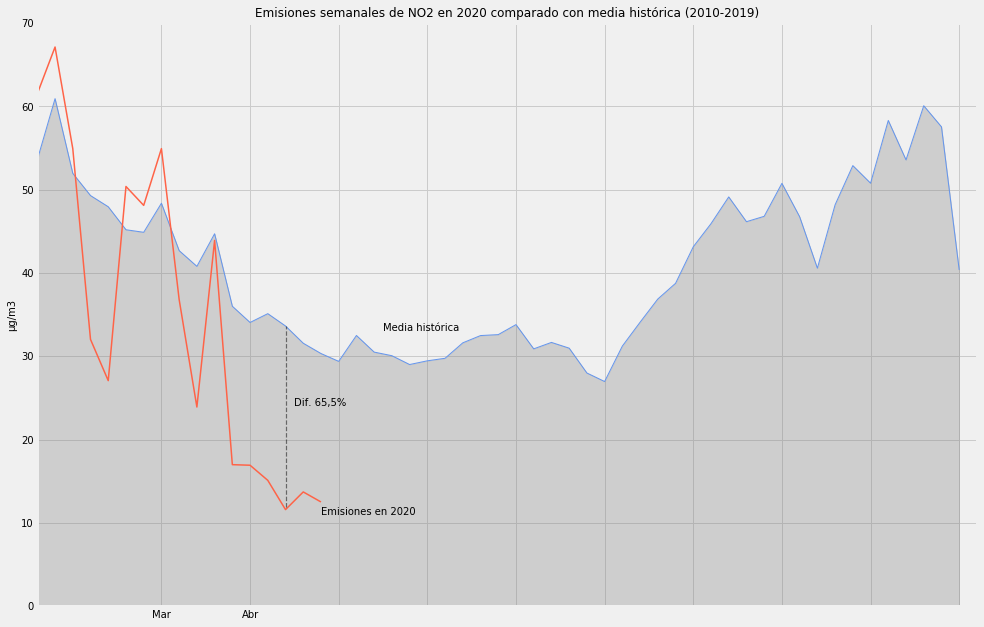

In [84]:
plt.figure(figsize=(15,10))

ax1=comparison3['Media histórica'].plot(linewidth=1, color = 'cornflowerblue')
ax2=comparison3['Emisiones en 2020'].plot(linewidth=1.5, color = 'tomato')

plt.title('Emisiones semanales de NO2 en 2020 comparado con media histórica (2010-2019)', fontsize = 12)

plt.xlabel('')
plt.ylabel('µg/m3', fontsize = 10)

plt.xticks(range(8,54, 5), ['Mar', 'Abr'], fontsize=10)
plt.yticks(list(range(0,80, 10)), fontsize=10)

ax1.set_ylim(ymin=0)
ax1.set_xlim(xmin=1,xmax=54)

plt.text(x=17, y=11, s='Emisiones en 2020', color='black', fontsize=10)
plt.text(x=20.5, y=33, s='Media histórica', color='black', fontsize=10)
plt.text(x=15.5, y=24, s='Dif. 65,5%', color='black', fontsize=10)

plt.axvline(x=15, ymin= 0.17, ymax= 0.48, linestyle='dashed', alpha=0.5, color = 'black', linewidth=1.2)

plt.fill_between(range(1,54), comparison3['Media histórica'], alpha = 0.3, color='grey')

plt.savefig('emisiones_his.pdf', bbox_inches='tight')
pass;

In [318]:
((33.644493	 -11.605442)/33.644493	) * 100


65.50567131447039

In [190]:
((34.066698- 16.931973)/34.066698) *100

50.29758093960266

#### 5.4. Months in period 2010-2020 with the lowest NO2 emissions 

In [85]:
# Group month period and sort
avg_no2_month = pd.DataFrame(df_avg_emissions.groupby
                             (df_avg_emissions.index.to_period('M'))
                             ['no2'].mean())

avg_no2_month_sorted = avg_no2_month[['no2']].sort_values(by='no2')

In [86]:
# March 2020 was the second cleanest month in the last 10 years
avg_no2_month_sorted.head(10)

no2
fecha             
2020-04  12.845599
2019-05  23.502933
2020-03  24.215054
2014-08  24.347647
2013-06  25.138175
2019-06  25.972121
2014-05  26.001466
2013-08  26.401341
2013-05  26.673021
2019-08  26.703828

In [330]:
((23.502933- 12.845599)/23.502933) *100

45.344698042580475

In [87]:
# Calculate difference 
avg_no2_month_sorted.pct_change()

no2
fecha            
2020-04       NaN
2019-05  0.829649
2020-03  0.030299
2014-08  0.005476
2013-06  0.032468
...           ...
2014-12  0.015540
2011-02  0.031932
2017-11  0.011564
2015-12  0.035528
2015-01  0.024829

[124 rows x 1 columns]